# Plot up 2D (surface) oil thickness for the Strait of Georgia Point
## Comparing high tide and low tide results for:
  - Alaska North Slope Crude (AKNS)
  - Diesel
  - Gasoline
  - Jet Fuel

In [119]:
# imports for graphic display
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
import cmocean as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# imports for data manipulation
import numpy as np
import xarray as xr
from salishsea_tools import viz_tools, utilities
import numpy.ma as ma
import datetime

## Load results

### high tide

In [3]:
AKNS = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/high_tide/Lagrangian_AKNS_crude_SOG_01dec17_MediumFloater_1000m3_6days_hi.nc')
diesel = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/high_tide/Lagrangian_DieselFuel_refined_SOG_01dec17_LightEvaporatorsDiesel_1000m3_6days_hi.nc')
gas = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/high_tide/Lagrangian_Gasoline_refined_SOG_01dec17_LightEvaporatorGas_1000m3_6days_hi.nc')
jet = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/high_tide/Lagrangian_JetFuel_refined_SOG_01dec17_LightEvaporatorJetFuel_1000m3_6days_hi.nc')

### low tide

In [4]:
AKNS_low = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/low_tide/Lagrangian_AKNS_crude_SOG_01dec17_MediumFloater_1000m3_6days_VVLfix.nc')
diesel_low = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/low_tide/Lagrangian_DieselFuel_refined_SOG_01dec17_LightEvaporatorsDiesel_1000m3_6days.nc')
gas_low = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/low_tide/Lagrangian_Gasoline_refined_SOG_01dec17_LightEvaporatorGas_1000m3_6days.nc')
jet_low = xr.open_dataset('/home/rmueller/Projects/MIDOSS/results/by_location/SOG_01dec2017/low_tide/Lagrangian_JetFuel_refined_SOG_01dec17_LightEvaporatorJetFuel_1000m3_6days.nc')

## Extract surface thickness and sum over time to get sense of where oil goes through simulation

### high tide

In [5]:
AKNS_thick = AKNS.Thickness_2D
diesel_thick = diesel.Thickness_2D
gas_thick = gas.Thickness_2D
jet_thick = jet.Thickness_2D

In [6]:
AKNS_thick_s = AKNS_thick.sum(dim='time')
diesel_thick_s = diesel_thick.sum(dim='time')
gas_thick_s = gas_thick.sum(dim='time')
jet_thick_s = jet_thick.sum(dim='time')

### low tide

In [7]:
AKNS_thick_low = AKNS_low.Thickness_2D
diesel_thick_low = diesel_low.Thickness_2D
gas_thick_low = gas_low.Thickness_2D
jet_thick_low = jet_low.Thickness_2D

In [8]:
AKNS_thick_low_s = AKNS_thick_low.sum(dim='time')
diesel_thick_low_s = diesel_thick_low.sum(dim='time')
gas_thick_low_s = gas_thick_low.sum(dim='time')
jet_thick_low_s = jet_thick_low.sum(dim='time')

## Plot results

/home/rmueller/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


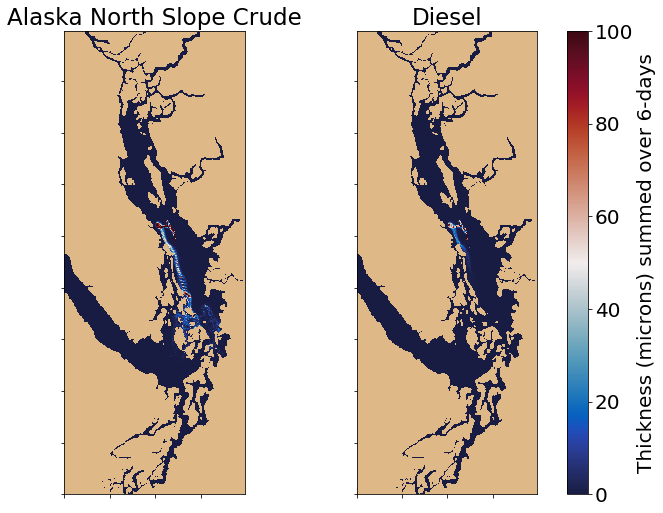

In [133]:
fig = plt.figure(figsize=(8*1.2,20*1.2))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# convert xarray into numpy using ".values" in order to gain access to different visualization tools
mappable = ax1.pcolormesh(AKNS_thick_s.values, vmin = 0, vmax = 100, cmap = cm.cm.balance)
mappable = ax2.pcolormesh(diesel_thick_s.values, vmin = 0, vmax = 100, cmap = cm.cm.balance)

# add land mask to ax1 and ax2
viz_tools.plot_land_mask(ax1,'/home/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
viz_tools.plot_land_mask(ax2,'/home/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')

# remove axis labelsand add titles for AKNS graphic
viz_tools.set_aspect(ax1)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#ax1.set_ylabel('test', fontsize = 20)
ax1.set_title('Alaska North Slope Crude', fontsize = 23)

# remove axis labelsand add titles for diesel graphic
viz_tools.set_aspect(ax2)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
#ax1.set_ylabel('test', fontsize = 20)
ax2.set_title('Diesel', fontsize = 23)

# add
# add colorbar 
#cbar = fig.colorbar(mappable)
#cbar.set_label('thickness', fontsize = 20)
#cbar.ax.tick_params(labelsize = 20)

# remove the colorbar to have more control on sizing
#test = mappable.colorbar
#test.remove()

# adjust colorbar for AKNS graphic
divider = make_axes_locatable(ax1)
c1 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c1)
cb.set_label('Thickness (microns) summed over 6-days', fontsize=20)
cb.ax.tick_params(labelsize = 20)
cb.remove()

# adjust colorbar for diesel graphic
divider = make_axes_locatable(ax2)
c2 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c2)
cb.set_label('Thickness (microns) summed over 6-days', fontsize=20)
cb.ax.tick_params(labelsize = 20)

viz_tools.plot_coastline

plt.savefig('./AKNS_Diesel_thickness')


/home/rmueller/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


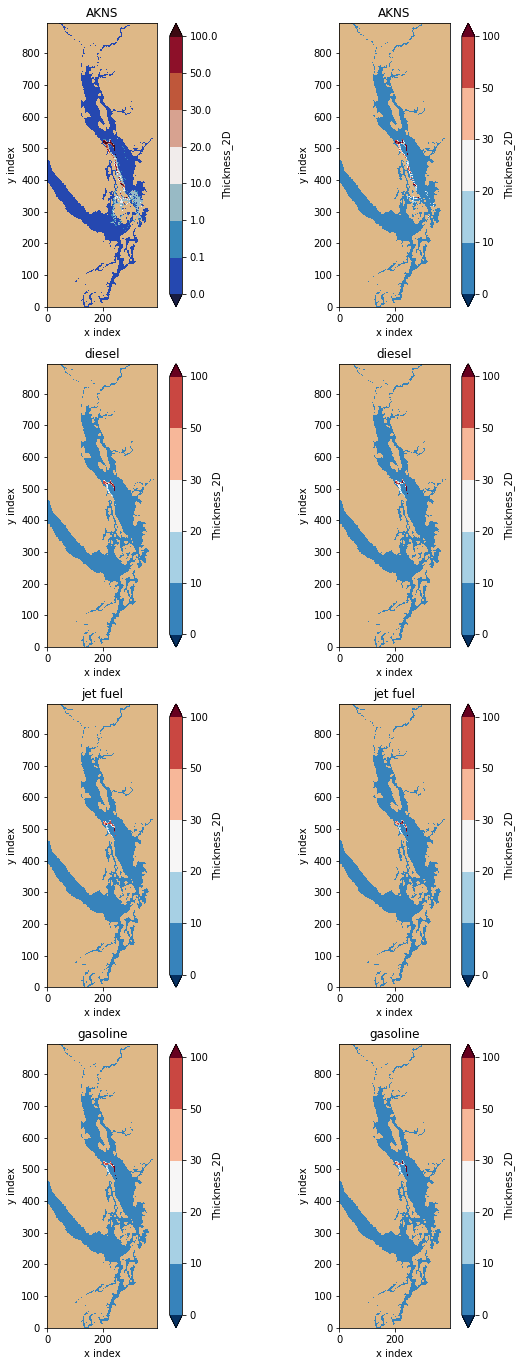

In [40]:
fig = plt.figure(figsize=(8*1.2,20*1.2))

# high tide
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(423)
ax3 = fig.add_subplot(425)
ax4 = fig.add_subplot(427)
ax5 = fig.add_subplot(422)
ax6 = fig.add_subplot(424)
ax7 = fig.add_subplot(426)
ax8 = fig.add_subplot(428)

ax_ar = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 ]


tplt = AKNS_thick_s.values
#ax1.scatter(tplt, cmap = cm.cm.balance)
# ax.
AKNS_thick_s.plot.pcolormesh(ax=ax1, levels = [0, 01, 10, 20, 30, 50,100], cmap = cm.cm.balance)
viz_tools.plot_land_mask(ax1,'/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
viz_tools.set_aspect(ax1)

diesel_thick_s.plot(ax=ax2, levels = [0, 10, 20, 30, 50,100])
jet_thick_s.plot(ax=ax3, levels = [0, 10, 20, 30, 50,100])
gas_thick_s.plot(ax=ax4, levels = [0, 10, 20, 30, 50,100])

# low tide


AKNS_thick_s.plot(ax=ax5, levels = [0, 10, 20, 30, 50,100])
diesel_thick_s.plot(ax=ax6, levels = [0, 10, 20, 30, 50,100])
jet_thick_s.plot(ax=ax7, levels = [0, 10, 20, 30, 50,100])
gas_thick_s.plot(ax=ax8, levels = [0, 10, 20, 30, 50,100])

# titles
ax1.set_title('AKNS')
ax2.set_title('diesel')
ax3.set_title('jet fuel')
ax4.set_title('gasoline')

# titles
ax5.set_title('AKNS')
ax6.set_title('diesel')
ax7.set_title('jet fuel')
ax8.set_title('gasoline')

for axis in ax_ar:
    viz_tools.plot_land_mask(axis,'/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', color = 'burlywood')
    viz_tools.set_aspect(axis)


In [102]:
test

/home/rmueller/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


1.1363636363636362